# Regression and Multivariate Analysis [MA4142]
# Project: Analysis of Weather History Dataset

In [104]:
# import all the necessary libraries here
library(dplyr)
library(NbClust)
library(psych)
library(useful)

In [58]:
# load data
dataset <- read.csv("weatherHistory.csv") 

dim(dataset)
head(dataset)

[1] 96453    12

,Formatted.Date,Summary,Precip.Type,Temperature..C.,Apparent.Temperature..C.,Humidity,Wind.Speed..km.h.,Wind.Bearing..degrees.,Visibility..km.,Loud.Cover,Pressure..millibars.,Daily.Summary
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
2,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
3,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
4,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
5,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
6,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,0,1016.66,Partly cloudy throughout the day.


In [70]:
# remove columns that are not needed
data <- select(dataset, -Formatted.Date, -Loud.Cover, -Daily.Summary)
head(data)

# check for missing values
colSums(is.na(data))

,Summary,Precip.Type,Temperature..C.,Apparent.Temperature..C.,Humidity,Wind.Speed..km.h.,Wind.Bearing..degrees.,Visibility..km.,Pressure..millibars.
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
2,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
3,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
4,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
5,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
6,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66


Summary              Precip.Type          Temperature..C. 
                       0                        0                        0 
Apparent.Temperature..C.                 Humidity        Wind.Speed..km.h. 
                       0                        0                        0 
  Wind.Bearing..degrees.          Visibility..km.     Pressure..millibars. 
                       0                        0                        0

In [74]:
summary(data)

   Summary          Precip.Type        Temperature..C.  
 Length:96453       Length:96453       Min.   :-21.822  
 Class :character   Class :character   1st Qu.:  4.689  
 Mode  :character   Mode  :character   Median : 12.000  
                                       Mean   : 11.933  
                                       3rd Qu.: 18.839  
                                       Max.   : 39.906  
 Apparent.Temperature..C.    Humidity      Wind.Speed..km.h.
 Min.   :-27.717          Min.   :0.0000   Min.   : 0.000   
 1st Qu.:  2.311          1st Qu.:0.6000   1st Qu.: 5.828   
 Median : 12.000          Median :0.7800   Median : 9.966   
 Mean   : 10.855          Mean   :0.7349   Mean   :10.811   
 3rd Qu.: 18.839          3rd Qu.:0.8900   3rd Qu.:14.136   
 Max.   : 39.344          Max.   :1.0000   Max.   :63.853   
 Wind.Bearing..degrees. Visibility..km. Pressure..millibars.
 Min.   :  0.0          Min.   : 0.00   Min.   :   0        
 1st Qu.:116.0          1st Qu.: 8.34   1st Qu.:1012

In [78]:
# Clustering Analysis

data.clustering <- select(data, -Summary, -Precip.Type)

data.clustering <- sapply(data.clustering, scale)
head(data.clustering)

Temperature..C.,Apparent.Temperature..C.,Humidity,Wind.Speed..km.h.,Wind.Bearing..degrees.,Visibility..km.,Pressure..millibars.
-0.2575977,-0.3240338,0.7934663,0.47863251,0.5912529,1.306969,0.1016847
-0.2698121,-0.3390953,0.6399922,0.49959129,0.6657523,1.306969,0.1059593
-0.2674856,-0.1381015,0.7934663,-0.99546821,0.1535690,1.099580,0.1086095
-0.3814869,-0.4590684,0.4865181,0.47630376,0.7588766,1.306969,0.1126276
-0.3326292,-0.3624667,0.4865181,0.03384067,0.6657523,1.306969,0.1134826
-0.2837715,-0.3500020,0.5888342,0.45534498,0.6564399,1.099580,0.1147649


Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”


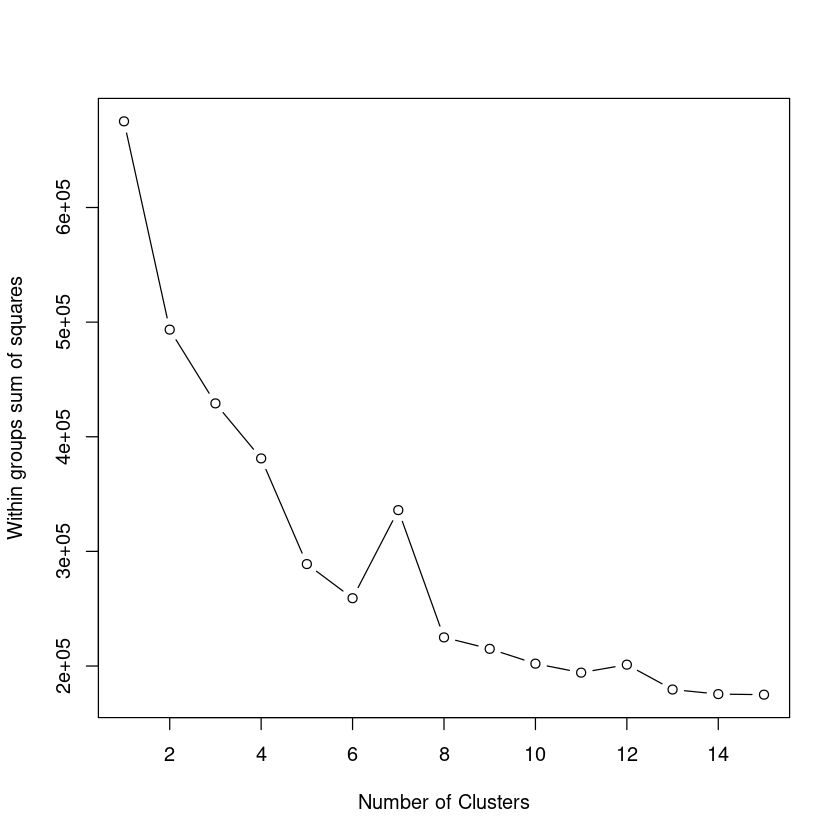

In [82]:
# Check for number of clusters
wssplot <- function(data, nc=15, seed=1234){
    wss <- (nrow(data)-1)*sum(apply(data,2,var))
    for (i in 2:nc){
            set.seed(seed)
            wss[i] <- sum(kmeans(data, centers=i)$withinss)
    }
    plot(1:nc, wss, type="b", xlab="Number of Clusters",
    ylab="Within groups sum of squares")
}

wssplot(data.clustering)

In [91]:
# NB clust 
nc <- NbClust(data.clustering, distance = "euclidean", min.nc=2, max.nc=15, method = "kmeans")
table(nc$Best.n[1,])
barplot(table(nc$Best.n[1,]),xlab="Numer of Clusters", ylab="Number of Criteria", main="Number of Clusters Chosen")

ERROR: Error: cannot allocate vector of size 34.7 Gb


In [96]:
# Kmeans clustering
set.seed(1234)

kmeans <- kmeans(data.clustering, centers=4, nstart=25)
kmeans$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 4
   [37] 4 4 4 4 4 4 4 4 4 4 1 1 1 1 2 1 1 2 2 1 1 1 1 1 4 4 1 1 1 1 2 2 2 2 2 2
   [73] 2 2 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
  [109] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 4 4 4 4 4 1 1 1 1 1
  [145] 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4
  [181] 4 4 4 4 4 4 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 4 1 4 4 4 4 4 4 1 1 1 1 1
  [217] 1 1 1 2 2 2 2 2 1 1 1 1 4 4 4 4 4 4 4 4 4 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
  [253] 1 4 1 4 4 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 1 1 1 1 1 1 1
  [289] 1 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [325] 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 4 4 4 4 4 4 4 4 1 1 1 1
  [361] 1 1 2 2 2 2 2 1 1 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 2 2 1 2 2 2 2 2 1 4 4 4
  [397] 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 2 1 1 1 4 4 4 4 4 4 4 4 4 4 4 1 1 1
  [433] 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [469] 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1
  [505] 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1
  [541] 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1
  [577] 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 2 2 1 1 1
  [613] 1 4 1 4 4 4 4 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1 1 1 2 1 1 2 2 2 1 2 1
  [649] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 1
  [685] 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 4 4 4 4 4 4 4 4 4 1 1 1 1
  [721] 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 2 1 1
  [757] 1 4 4 4 4 4 4 4 1 4 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1
  [793] 1 1 1 1 1 1 1 1 1 1 4 4 1 1 4 4 4 4 4 4 1 1 1 1 2 1 1 1 1 1 2 1 1 1 4 4
  [829] 4 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 4 4 4 4 4 3 4 1 1 1 1
  [865] 1 1 1 1 1 1 1 1 1 1 3 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4
  [901] 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 1
  [937] 1 1 1 1 1 1 1 1 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 1 1 1 1 1 1 1 4 4 4 4
  [973] 4 4 4 4 4 4 4 4 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 1 1 1
 [1009] 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 4 4
 [1045] 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 3 3 4 1 1 1
 [1081] 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 2 2 2 2 1 1 4 3 4
 [1117] 4 3 4 4 4 4 4 4 4 1 1 1 1 1 1 1 3 1 1 1 1 4 3 4 4 3 4 4 4 4 3 4 1 1 3 1
 [1153] 1 1 1 1 1 1 3 3 1 3 4 4 4 3 4 4 4 4 3 3 1 1 1 1 1 1 1 1 3 1 1 3 1 4 4 4
 [1189] 4 4 4 4 3 4 3 3 1 1 1 1 1 3 1 1 1 1 3 3 1 1 1 1 1 1 4 3 3 4 4 1 1 1 3 1
 [1225] 1 1 1 3 1 1 1 3 2 1 1 1 3 3 4 3 3 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1261] 1 4 4 4 4 4 4 4 1 1 1 2 1 1 1 3 3 1 1 1 1 3 3 1 1 1 1 3 3 1 1 3 1 1 3 1
 [1297] 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 1 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 [1333] 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 4 4 4 4 4 1 3 3 1
 [1369] 3 3 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4
 [1405] 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 1 4 4 4 4 1 1 1 1 1
 [1441] 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 [1477] 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1
 [1513] 1 2 1 2 1 1 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1549] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1585] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 [1621] 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1657] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1693] 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1729] 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 [1765] 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 [18

In [106]:
km <- FitKMeans(data.norm, max.clusters=30, nstart=25, seed=278613, iter.max = 25)
PlotHartigan(km)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4822650)”
Warning message:
“Quick-T